<a href="https://colab.research.google.com/github/its-rajesh/Deep-Learning/blob/main/Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Keras-Tensorflow Tutorial**

**Course**: *CS671 - Deep Learning & Applications*

**Instructor**: *Prof. Dileep A.D.*

**Tutorial by**: *Rajesh R (S21005)* | **Date**: 10 March 2023

**Reference**: *https://keras.io/*

## **First Things First**

**Installing Tensorflow**:
Using conda environment is recommended
*   `conda install -c conda-forge tensorflow` 
*   `conda install -c anaconda tensorflow-gpu` (if you have GPU)

**In colab**:

Tensorflow is preinstalled on the server. To use the specific version:

`!pip uninstall tensorflow`

`!pip install tensorflow==2.11.0`

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## **Ways To Create Model**

*Keras offers three ways to create the neural network models:*

1.   *Sequential API* *(Beginners)*
2.   *Functional API* *(Intermediate)*
3.   *Model Subclassing* *(Experts)*
 

### **Sequential API**

*A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor*

*A Sequential model is not appropriate when:*
*   *Your model has multiple inputs or multiple outputs*
*   *Any of your layers has multiple inputs or multiple outputs*
*   *You need to do layer sharing*
*   *You want non-linear topology (e.g. a residual connection, a multi-branch model)*


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

*You can create a Sequential model by passing a list of layers to the Sequential constructor:*

In [ ]:
model = keras.Sequential([
        layers.Dense(10, activation="sigmoid", name="layer1"),
        layers.Dense(10, activation="sigmoid", name="layer2"),
        layers.Dense(2, activation="softmax", name="output"),
        ])

*You can also create a Sequential model incrementally via the add() method:*

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(10, activation="sigmoid", name="layer1"))
model.add(layers.Dense(10, activation="sigmoid", name="layer2"))
model.add(layers.Dense(2, activation="softmax", name="output"))

### **Functional API**

*   *Can handles non-linear models with more functionalities than Sequential API*

*   *Accepts multiple inputs and multiple outputs*

*   *Can model highly complex networks*

*   *Extremely scalable and flexible*

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
inputs = Input(shape=(3,))

x = Dense(10, activation='sigmoid')(inputs)
x = Dense(10, activation='sigmoid')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

*Autoencoders, Enocoder-Decoder Architecture*

In [ ]:
inputs = Input(shape=(3,))

l1 = Dense(20, activation='sigmoid')(inputs)
l2 = Dense(10, activation='sigmoid')(l1)
l3 = Dense(5, activation='sigmoid')(l2)
l4 = Dense(10, activation='sigmoid')(l3)
outputs = Dense(20, activation='sigmoid')(l4)

full_model = Model(inputs=inputs, outputs=outputs)
encoder = Model(inputs=inputs, outputs=l3)
decoder = Model(inputs=l3, outputs=outputs)

### **Model Subclassing**

*   *Object oriented approach to create the model*
*   *More powerful than Functional API*
*   *Should define layers in `__init__()` and should implement the model's forward pass in `call()`*
*   *Can optionally have a training argument (boolean) in `call()`, which can be used to specify a different behavior in training and inference*
*   *Example: Can set certain weights within a layer to be non-trainable, etc*



In [ ]:
import tensorflow as tf

In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(10, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    self.dropout = tf.keras.layers.Dropout(0.5)

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    if training:
      x = self.dropout(x, training=training)
    return self.dense2(x)

model = MyModel()

### **Defining Layers, Activation Functions & Other Parameters**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [5]:
inputs = Input(shape=(2,))

x = Dense(10, activation='sigmoid', name='Hidden_Layer_1')(inputs)
x = Dense(10, activation='sigmoid', name='Hidden_Layer_2')(x)
outputs = Dense(2, activation='softmax', name='Output_Layer')(x)

model = Model(inputs=inputs, outputs=outputs)

**Example**: **Dense Layer** (https://keras.io/api/layers/core_layers/dense/)

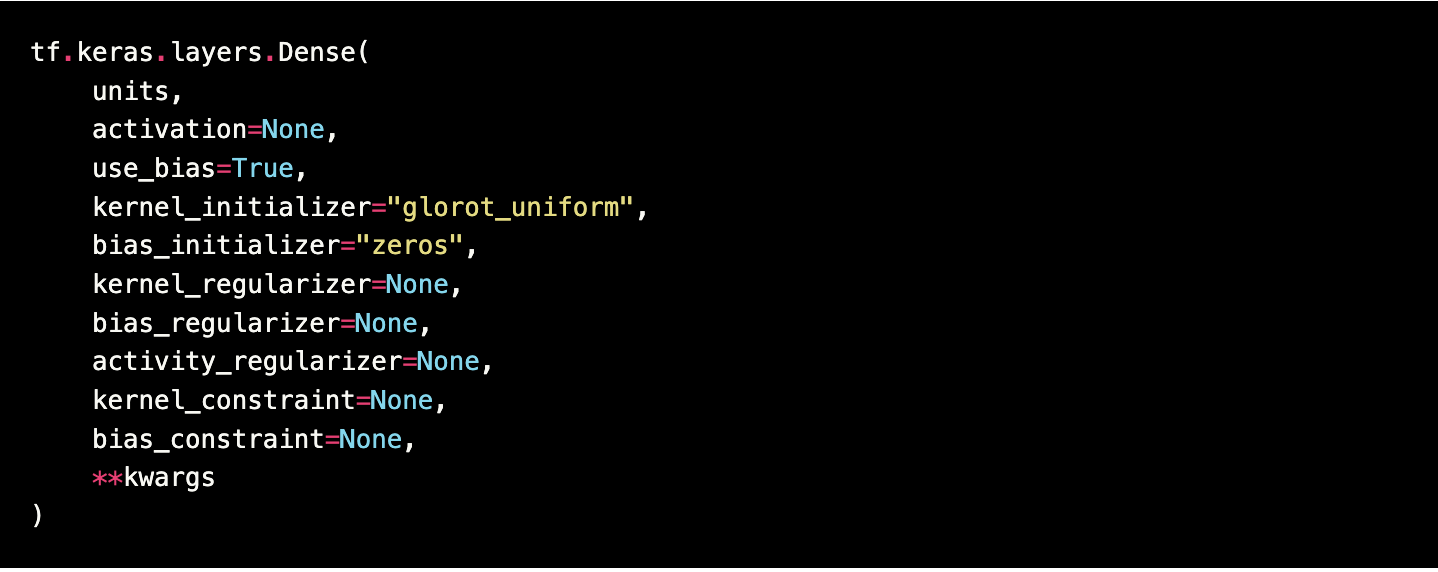

**List of Layers:** https://keras.io/api/layers/

**List of Activations:** https://keras.io/api/layers/activations/

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 10)                30        
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                110       
                                                                 
 Output_Layer (Dense)        (None, 2)                 22        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


## **Compiling the Model**

### **Optimizers**

*Keras offers various optimization techniques to compile the network. Few are:*

*   *SGD, RMSProp, Adagrad, Adam, ..*
*   *Whole list: https://keras.io/api/optimizers/*

In [12]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop

In [14]:
sgd_optimizer = SGD(learning_rate=0.001,name='SGD') #Normal Gradient Descent
momentum_optimizer = SGD(learning_rate=0.001, momentum=0.8,name='Momentum_SGD') #Momentum Based
nag_optimizer = SGD(learning_rate=0.001, nesterov=True, name='NAG') #NAG
rms_optimizer = RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, name="RMSProp") #RMSProp
adagrad_optimizer = Adagrad(learning_rate=0.001, epsilon=1e-07, name="Adagrad") #AdaGrad
adam_optimizer = Adam(learning_rate=0.01) #Adam

### **Loss Functions**

*Keras offers various predefined popular loss functions.*



*   *Mean Squared Error, Binary Cross Entropy, Categorical Cross Entropy, KL Divergence, ...*
*   *https://keras.io/api/losses/*

### **Compilation**

In [16]:
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

*More details at: https://keras.io/api/models/model_training_apis/*

## **Fitting the Model**

### **Callbacks**

*A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).*

**You can use callbacks to:**

*   *Write TensorBoard logs after every batch of training to monitor your metrics*
*   *Periodically save your model to disk*
*   *Do early stopping*
*   *Get a view on internal states and statistics of a model during training*

*and much more*

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [23]:
my_callbacks = [
   EarlyStopping(monitor='loss', patience=2),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    TensorBoard(log_dir='./logs')]

### **Model Fitting**

In [32]:
'''
model_fit = model.fit(x=training_set, y=label_set, batch_size=32, epochs=1000, verbose="auto", callbacks=my_callbacks,
    validation_split=0.0, validation_data=(input, label), shuffle=True, validation_batch_size=None)
'''

'\nmodel_fit = model.fit(x=training_set, y=label_set, batch_size=32, epochs=1000, verbose="auto", callbacks=my_callbacks,\n    validation_split=0.0, validation_data=(input, label), shuffle=True, validation_batch_size=None)\n'

*More details at: https://keras.io/api/models/model_training_apis/*

## **Evaluating and Predicting the Model**

**Evaluate**: *Returns the test accuracy and test loss (if the model has a single output and no metrics)* 

In [30]:
#model.evaluate(x=test_data, y=test_samples, batch_size=None, verbose="auto",callbacks=None)

More details at: https://keras.io/api/models/model_training_apis/#evaluate

**Predict**: *Generates output predictions for the input samples*



In [31]:
#model.predict(x, batch_size=None, verbose="auto", callbacks=None)

More details at: https://keras.io/api/models/model_training_apis/#predict

## **Other Important Basic Stuffs**

**Error vs Epoch and Accuracy Plots**

In [33]:
#model_fit.history['loss'] #Returns x (epochs) and y (loss)
#model_fit.history['accuracy'] #Returns x (epochs) and y (accuracy)

**Saving a model**

In [ ]:
#model.save('path/to/location/myclass_model.h5')

**Loading a model**

In [34]:
#model = keras.models.load_model('path/to/location/myclass_model.h5')

**Get trained weights**

In [35]:
for layer in model.layers:
    weights = layer.get_weights()

**Kernel Initializers**

In [36]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

In [39]:
from tensorflow.keras import initializers

layer = Dense(64,
    kernel_initializer=initializer,
    bias_initializer=initializers.Zeros()
)

**Freeze Layers**

In [40]:
frozen_layer = Dense(32, trainable=False)

In [41]:
model = Sequential([
    ResNet50Base(input_shape=(32, 32, 3), weights='pretrained'),
    Dense(10),
])
model.layers[0].trainable = False  # Freeze ResNet50Base.

assert model.layers[0].trainable_weights == []  # ResNet50Base has no trainable weights.
assert len(model.trainable_weights) == 2  # Just the bias & kernel of the Dense layer.

model.compile(...)
model.fit(...)  # Train Dense while excluding ResNet50Base.